# AI in Production: Data Science Tools

This notebook is meant to accompany [these slides](https://docs.google.com/presentation/d/1nVuLd79JPxDpQ4wKsGPNIZJcw6Ocm-gAjJaxtNWAcpk/edit#slide=id.p). Prepared for Artificial Intelligence for Public Health (AI4PH) Summer Institute. 

## <font color='green'>New Tool Alert:</font> Anaconda

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/c/cd/Anaconda_Logo.png/440px-Anaconda_Logo.png" alt="Anaconda Logo" style="height: 100px;"/>

**What is it**: Anaconda is a distribution of the Python and R programming languages for scientific computing, that aims to simplify package management and deployment. The distribution includes data-science packages suitable for Windows, Linux, and macOS.

**Why use it**: Anaconda lets you easily create and manage various environment with isolated dependencies.

**Download**: Download from [here](https://www.anaconda.com/products/individual)

**Resources**: Conda cheat sheet [here](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)

### Setting Up Anaconda Environment and Installing Jupyter Notebooks

After installing anaconda, open up your command prompt or terminal window

Create a new environment
```
conda create --name dstools

```

To see if the command worked and list all your environments run
```
conda env list
```

<img src="./list.png" alt="Image Info" style="height: 300px;"/>

Now activate the environment by running
```
conda activate dstools
```

Finally install jupyter notebooks
```
conda install jupyter notebook
```

Now lunch jupyter notebook by typing
```
jupyter notebook
```

## <font color='green'>New Tool Alert:</font> Jupyter Notebook

<img src="https://www.dataquest.io/wp-content/uploads/2019/01/1-LPnY8nOLg4S6_TG0DEXwsg-1.png" alt="Jupyter Logo" style="height: 300px;"/>

**What is it**: A Jupyter notebook is a document that supports mixing executable code, equations, visualizations, and narrative text. Specifically, Jupyter notebooks allow the user to bring together data, code, and prose, to tell an interactive, computational story. Jupyter notebook is free and open source and supports over 100 programming languages including Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala, and many more

**Why use it**: Jupyter is an interactive environment that can be shared with anyone. They can run through the code, collaborate and understand the story by mixing formatted text with the code.

**Download**: Install from [here](https://jupyter.org/install)

**Resources**: Cheat sheet [here](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)

This will open a new tab in your default web browser that should look something like the following screenshot.

![Jupyter](Jupyter.png)

This is the Notebook Dashboard, specifically designed for managing your Jupyter Notebooks. Think of it as the launchpad for exploring, editing and creating your notebooks.

You can create a new notebook by clicking New in the top right hand corner

![Markdown](New.png)

This lets you create a new notebook. Currently the only option is Python. However if you have other kernels installed (such as R) you would see them here.

![Notebook](https://www.dataquest.io/wp-content/uploads/2019/01/new-notebook.jpg)

Once you have opened the notebook, the interface shouldn't be too hard to figure out. There are two new terms you have to learn

* Kernels: the engine that executes the code. Could be python, R, or other.
* Cells: container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.

In each cell, you can either write code to execute or write markdown (text formatting system similiar to HTML). 

To execute code, you can use the run button in the toolbar, or use the shortcut of `shift + enter` Go ahead and execute the following code block which should print out `Hello AI4PH` by using either the run button or the shortcut keys

In [2]:
print("Hello AI4PH")

Hello AI4PH


When we run the cell, its output is displayed below and the label to its left will have changed from In [ ] to In [1]. Representing the first code cell being run

Run the cell again and the label will change to In [2] because now the cell was the second to be run on the kernel. This numbering system makes it clear the order in which your code was run. While it's good practice to clean up your code and make sure it should be run from the top of the page to the bottom, this requirements is not enforced. Which is why this number system is so cruicial. 

## Let's Get To The Example

We are going to first try to scrape some data from Ontario's Covid Website. This website was the only source of information we had in the beggining. While data sources have matured over time, web scrapping is a fairly unique and extremely useful skilset to have in your toolbelt when doing public health on the go.

To do this we will be using selenium which is a python based library most commonly that is used to automated browser operations. Since Ontario's website uses some code to dynamically load, we have to use selenium to properly have access to all the data elements.

First let's install our dependencies below

In [29]:
!pip3 install bs4
!pip3 install selenium
!pip3 install pandas
!pip3 install html5lib
!pip3 install matplotlib

     |████████████████████████████████| 7.2 MB 576 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 461 kB/s  eta 0:00:01


## <font color='green'>New Tool Alert:</font> Selenium

<img src="https://camo.githubusercontent.com/74ed64243ba05754329bc527cd4240ebd1c087a1/68747470733a2f2f73656c656e69756d2e6465762f696d616765732f73656c656e69756d5f6c6f676f5f7371756172655f677265656e2e706e67" alt="Selenium" style="width: 200px;"/>

**What is it**: It's a tool used to scrape data from the web which lets you automate the operations of your browser

**Why use it**: A lot of information remains locked in websites and is only updated there without being available in a easy to use format. Selenium lets us get access to that info and turn it into usable data.

**Download**: Download from [here](https://selenium-python.readthedocs.io/)

**Resources**: Cheat sheet [here](https://ivantay2003.medium.com/selenium-cheat-sheet-in-python-87221ee06c83)

For this example, we need to set up selenium. Follow instructions [here](https://selenium-python.readthedocs.io/installation.html#installing-python-bindings-for-selenium) on how to set up selenium. I've downloaded the zipfile for the most popular platforms. Unzipping it here should work. 

Users on MacOS will need to do to an additional step to be able to use the driver, which is to mark the file as safe by using the command ```xattr -d com.apple.quarantine <name-of-executable>```

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get("http://www.python.org")
elem = driver.find_element_by_name("q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
driver.close()

If selenium is set up, this should launch your browser to python's website, and search for the words pycon.

Now that we know things are working, let's go to our real example.

In [6]:
url = "https://www.ontario.ca/page/how-ontario-is-responding-covid-19"
driver = webdriver.Chrome(executable_path='./chromedriver')
driver.get(url)

This should open a new chromium page and navigate it to our data source. Now we use the xpath of the table of interest to get the specific element on the page and we save its html content to a variable

In [18]:
element = driver.find_element_by_xpath('//*[@id="pagebody"]/table[1]')
element_html = element.get_attribute('outerHTML')
driver.close()

The next library we will be using today is called pandas. Pandas is the go to data manipulation and wrangling library for python

In [17]:
import pandas as pd

df = pd.read_html(element_html)[0]
df.head()

,Severity,Number,Percentage
0,Number of cases footnote 1 [1],548217,NaN
1,Change from previous report (new cases),177,< 0.1% increase
2,Resolved footnote 2 [2],537545,98.1
3,Change from previous report,166,< 0.1% increase
4,Subset of all cases that are reported to be lo...,15449,2.8


Now that we have our table of interest we can just save it to file, so we can start to keep track of cases daily. 

In [19]:
df.to_csv('cases-july-17-2021.csv',index=False)

### Let's Get More Data

The main dataset we will be using is from [here](https://data.ontario.ca/en/dataset/confirmed-positive-cases-of-covid-19-in-ontario).

In [20]:
url = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"
all_cases = pd.read_csv(url)

In [21]:
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2019-05-30,2020-05-05,2020-05-05,2020-05-03,50s,FEMALE,CC,Resolved,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
1,2,2019-11-20,2020-10-21,2020-11-21,2019-11-20,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
2,3,2020-01-01,2020-04-24,2020-04-24,2020-04-23,80s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
3,4,2020-01-01,2020-05-17,2020-05-17,2020-05-15,50s,MALE,CC,Resolved,NaN,2265,"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.regionofwaterloo.ca,43.462876,-80.520913
4,5,2020-01-01,2021-01-09,2021-01-09,2021-01-07,50s,MALE,CC,Resolved,NaN,2268,Windsor-Essex County Health Unit,1005 Ouellette Avenue,Windsor,N9A 4J8,www.wechu.org,42.308796,-83.033670


In [35]:
agg = all_cases.groupby(['Accurate_Episode_Date'])['Row_ID'].count().to_frame().reset_index()
agg['Accurate_Episode_Date'] = pd.to_datetime(agg['Accurate_Episode_Date'])
agg.tail()

,Accurate_Episode_Date,Row_ID
531,2021-07-14,119
532,2021-07-15,93
533,2021-07-16,83
534,2021-07-17,44
535,2021-07-18,3


Text(0.5, 1.0, 'Number of cases over time')

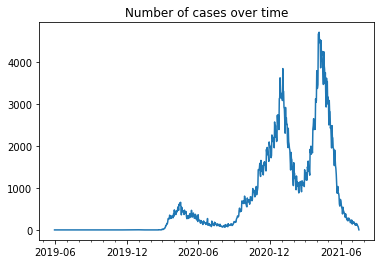

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig = plt.figure()
ax = plt.axes()

x = agg['Accurate_Episode_Date']
y = agg['Row_ID']
ax.plot(x, y)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Number of cases over time")